<a href="https://colab.research.google.com/github/Mithil-Katkoria/Day-4_ML/blob/main/Day_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Task is to predict TITANIC Surviver**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_excel("/content/titanic.xlsx")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total Fare:,NaN,NaN


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         893 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(6), object(6)
memory usage: 84.1+ KB


In [8]:
data.shape

(896, 12)

In [9]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total Fare:,NaN,NaN
895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28693.9,NaN,NaN


In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [15]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total Fare:,NaN,NaN


In [33]:
data.isnull().sum()

Survived    5
Pclass      5
Sex         5
Age         0
SibSp       5
Parch       5
Fare        3
Embarked    0
dtype: int64

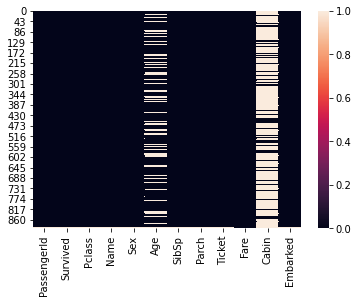

In [16]:
sns.heatmap(data.isnull())

In [ ]:
data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'],axis = 1, inplace = True)

In [20]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.25,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.925,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1,S
4,0.0,3.0,male,35.0,0.0,0.0,8.05,S
...,...,...,...,...,...,...,...,...
891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,NaN,NaN,NaN,NaN,NaN,NaN,Total Fare:,NaN


In [22]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
data['Embarked'].fillna("S", inplace = True)

In [25]:
data['Embarked'].value_counts()

S    651
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
data.isnull().sum()

Survived      5
Pclass        5
Sex           5
Age         182
SibSp         5
Parch         5
Fare          3
Embarked      0
dtype: int64

In [27]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

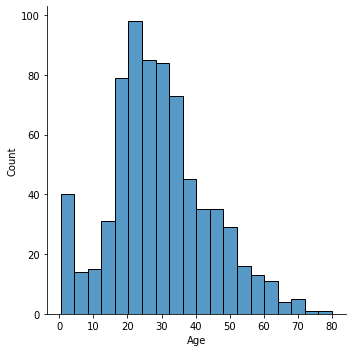

In [28]:
sns.displot(data['Age'])

In [30]:
data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [31]:
#177 null values
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [32]:
data.isnull().sum()

Survived    5
Pclass      5
Sex         5
Age         0
SibSp       5
Parch       5
Fare        3
Embarked    0
dtype: int64

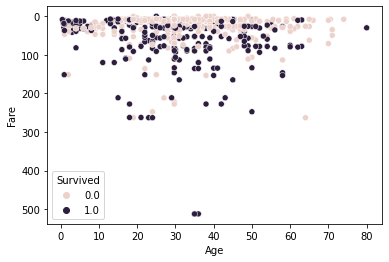

In [34]:
sns.scatterplot(x = 'Age',y = 'Fare',hue = 'Survived',data = data)

# **Data Transformation Using Label Encoder and OnHotEncoder**

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.25,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.925,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1,S
4,0.0,3.0,male,35.0,0.0,0.0,8.05,S


In [ ]:
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Sex"])
data["Gender"]

In [42]:
data['Sex'].map({'male' : 1, 'female' : 0})

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
891    NaN
892    NaN
893    NaN
894    NaN
895    NaN
Name: Sex, Length: 896, dtype: float64

In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.25,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.925,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1,S
4,0.0,3.0,male,35.0,0.0,0.0,8.05,S


In [44]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [46]:

ohe = OneHotEncoder()
ohe.fit_transform(data[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [47]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.000000,1.0,0.0,7.25,S
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.000000,0.0,0.0,7.925,S
3,1.0,1.0,female,35.000000,1.0,0.0,53.1,S
4,0.0,3.0,male,35.000000,0.0,0.0,8.05,S
...,...,...,...,...,...,...,...,...
891,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
892,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
893,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
894,NaN,NaN,NaN,29.699118,NaN,NaN,Total Fare:,S


In [51]:
df_1 = pd.get_dummies(data['Embarked'], drop_first = True)

In [52]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.000000,1.0,0.0,7.25,S
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.000000,0.0,0.0,7.925,S
3,1.0,1.0,female,35.000000,1.0,0.0,53.1,S
4,0.0,3.0,male,35.000000,0.0,0.0,8.05,S
...,...,...,...,...,...,...,...,...
891,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
892,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
893,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
894,NaN,NaN,NaN,29.699118,NaN,NaN,Total Fare:,S


In [53]:
df_2 = pd.concat([data, df_1],axis = 1)

In [54]:
df_1

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
891,0,1
892,0,1
893,0,1
894,0,1


In [55]:
df_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0.0,3.0,male,22.000000,1.0,0.0,7.25,S,0,1
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C,0,0
2,1.0,3.0,female,26.000000,0.0,0.0,7.925,S,0,1
3,1.0,1.0,female,35.000000,1.0,0.0,53.1,S,0,1
4,0.0,3.0,male,35.000000,0.0,0.0,8.05,S,0,1
...,...,...,...,...,...,...,...,...,...,...
891,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S,0,1
892,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S,0,1
893,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S,0,1
894,NaN,NaN,NaN,29.699118,NaN,NaN,Total Fare:,S,0,1


In [56]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.000000,1.0,0.0,7.25,S
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.000000,0.0,0.0,7.925,S
3,1.0,1.0,female,35.000000,1.0,0.0,53.1,S
4,0.0,3.0,male,35.000000,0.0,0.0,8.05,S
...,...,...,...,...,...,...,...,...
891,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
892,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
893,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,S
894,NaN,NaN,NaN,29.699118,NaN,NaN,Total Fare:,S


In [62]:
x = df_2.drop('Survived', axis = 1)
y = df_2['Survived']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25) 